In [164]:
# Config
INPUT_CSV = "PPG-BP dataset(cardiovascular dataset).csv"
OUTPUT_CSV = "ppg_bp_normalized_standard_with_categories.csv"

In [165]:
# Bước 1: Import các thư viện cần thiết
import pandas as pd # Thư viện xử lý dữ liệu
import matplotlib.pyplot as plt # Thư viện vẽ đồ thị
from sklearn.preprocessing import StandardScaler, LabelEncoder # Thư viện chuẩn hóa và mã hóa dữ liệu

In [166]:
# Bước 2: Load file CSV và đặt lại tên cho các cột
df = pd.read_csv(INPUT_CSV, skiprows=1) # Bỏ cột thứ tự ở đầu ko cần thiết
df.columns = [
    "Num", "subject_ID", "Sex", "Age", "Height", "Weight",
    "Systolic_BP", "Diastolic_BP", "Heart_Rate", "BMI",
    "Hypertension", "Diabetes", "Cerebral_infarction", "Cerebrovascular_disease"
]

# Hiển thị một số thông tin về dataset
display(df.head(30))

print("=== Thông tin cơ bản ===")
df.info()

print("\n=== Giá trị thiếu ===")
print(df.isna().sum())

print("\n=== Thống kê ===")
df.describe()

,Num,subject_ID,Sex,Age,Height,Weight,Systolic_BP,Diastolic_BP,Heart_Rate,BMI,Hypertension,Diabetes,Cerebral_infarction,Cerebrovascular_disease
0,1,2,Female,45,152,63,161,89,97,27.27,Stage 2 hypertension,NaN,NaN,NaN
1,2,3,Female,50,157,50,160,93,76,20.28,Stage 2 hypertension,NaN,NaN,NaN
2,3,6,Female,47,150,47,101,71,79,20.89,Normal,NaN,NaN,NaN
3,4,8,Male,45,172,65,136,93,87,21.97,Prehypertension,NaN,NaN,NaN
4,5,9,Female,46,155,65,123,73,73,27.06,Prehypertension,NaN,NaN,NaN
5,6,10,Female,48,160,68,124,62,70,26.56,Prehypertension,NaN,NaN,NaN
6,7,11,Female,48,153,49,126,78,84,20.93,Prehypertension,NaN,NaN,NaN
7,8,12,Female,53,160,70,108,73,84,27.34,Normal,NaN,NaN,NaN
8,9,13,Male,58,165,55,89,42,63,20.20,Normal,NaN,NaN,NaN
9,10,14,Female,47,150,47,98,56,69,20.89,Normal,NaN,NaN,NaN


=== Thông tin cơ bản ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Num                      219 non-null    int64  
 1   subject_ID               219 non-null    int64  
 2   Sex                      219 non-null    object 
 3   Age                      219 non-null    int64  
 4   Height                   219 non-null    int64  
 5   Weight                   219 non-null    int64  
 6   Systolic_BP              219 non-null    int64  
 7   Diastolic_BP             219 non-null    int64  
 8   Heart_Rate               219 non-null    int64  
 9   BMI                      219 non-null    float64
 10  Hypertension             219 non-null    object 
 11  Diabetes                 38 non-null     object 
 12  Cerebral_infarction      20 non-null     object 
 13  Cerebrovascular_disease  25 non-null     object 
dtypes

,Num,subject_ID,Age,Height,Weight,Systolic_BP,Diastolic_BP,Heart_Rate,BMI
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,110.000000,156.598174,57.168950,161.228311,60.191781,127.945205,71.849315,73.639269,23.107215
std,63.364028,101.604347,15.874327,8.202871,11.886301,20.377779,11.111203,10.738874,4.004302
min,1.000000,2.000000,21.000000,145.000000,36.000000,80.000000,42.000000,52.000000,14.690000
25%,55.500000,85.500000,48.000000,155.000000,52.500000,113.500000,64.000000,66.000000,20.550000
50%,110.000000,152.000000,58.000000,160.000000,60.000000,126.000000,70.000000,73.000000,22.600000
75%,164.500000,214.500000,67.500000,167.000000,66.500000,139.000000,78.000000,80.000000,25.000000
max,219.000000,419.000000,86.000000,196.000000,103.000000,182.000000,107.000000,106.000000,37.460000


In [167]:
# Bước 3: Trích xuất các thuộc tính độc nhất trong các cột thuộc tính phân loại
def uniques(col):
    return sorted(df[col].dropna().astype(str).unique().tolist())

for key, value in {
    "Sex": uniques("Sex"),
    "Hypertension": uniques("Hypertension"),
    "Diabetes": uniques("Diabetes"),
    "Cerebral_infarction": uniques("Cerebral_infarction"),
    "Cerebrovascular_disease": uniques("Cerebrovascular_disease"),
}.items(): print(key, value)

Sex ['Female', 'Male']
Hypertension ['Normal', 'Prehypertension', 'Stage 1 hypertension', 'Stage 2 hypertension']
Diabetes ['Diabetes', 'Type 2 Diabetes']
Cerebral_infarction ['cerebral infarction']
Cerebrovascular_disease ['cerebrovascular disease', 'insufficiency of cerebral blood supply']


In [168]:
# Bước 4: Phân loại các cột và đảm bảo kiểu dữ liệu đúng
numeric_cols = ["Age", "Height", "Weight", "Systolic_BP", "Diastolic_BP", "Heart_Rate", "BMI"]
condition_nominal_cols = ["Diabetes", "Cerebral_infarction", "Cerebrovascular_disease"]

# Biến đổi các cột số, các giá trị ko hợp lệ chuyển thành NaN
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

In [169]:
# Bước 5: Encode Sex (Female/Male → 0/1)
df["Sex"] = LabelEncoder().fit_transform(df["Sex"].astype(str))
df["Sex"].value_counts()

Sex
0    115
1    104
Name: count, dtype: int64

In [170]:
# Bước 6: Encode Hypertension (dùng ordinal encode để model có thể học được độ nghiêm trọng của từng tình trạng)
htn_order_map = {
    "Normal": 0,
    "Prehypertension": 1,
    "Stage 1 hypertension": 2,
    "Stage 2 hypertension": 3,
}
df["Hypertension"] = df["Hypertension"].map(htn_order_map)

# Thay các ô thiếu giá trị bằng mode (giá trị phổ biến nhất), giá trị = 0 nếu ko tìm được mode
if df["Hypertension"].isna().any():
    mode_val = df["Hypertension"].mode(dropna=True)
    fill_val = int(mode_val.iloc[0]) if not mode_val.empty else 0
    df["Hypertension"] = df["Hypertension"].fillna(fill_val)

df.head(30)

,Num,subject_ID,Sex,Age,Height,Weight,Systolic_BP,Diastolic_BP,Heart_Rate,BMI,Hypertension,Diabetes,Cerebral_infarction,Cerebrovascular_disease
0,1,2,0,45,152,63,161,89,97,27.27,3,NaN,NaN,NaN
1,2,3,0,50,157,50,160,93,76,20.28,3,NaN,NaN,NaN
2,3,6,0,47,150,47,101,71,79,20.89,0,NaN,NaN,NaN
3,4,8,1,45,172,65,136,93,87,21.97,1,NaN,NaN,NaN
4,5,9,0,46,155,65,123,73,73,27.06,1,NaN,NaN,NaN
5,6,10,0,48,160,68,124,62,70,26.56,1,NaN,NaN,NaN
6,7,11,0,48,153,49,126,78,84,20.93,1,NaN,NaN,NaN
7,8,12,0,53,160,70,108,73,84,27.34,0,NaN,NaN,NaN
8,9,13,1,58,165,55,89,42,63,20.20,0,NaN,NaN,NaN
9,10,14,0,47,150,47,98,56,69,20.89,0,NaN,NaN,NaN


In [171]:
# Bước 7: Dùng One-hot encode cho các cột Diabetes, Cerebral_infarction, Cerebrovascular_disease (các cột này ko biểu hiện độ nghiêm trọng của từng trạng thái)
for col in condition_nominal_cols:
    df[col] = df[col].astype(str).where(df[col].notna(), other="None") # Thay NaN bằng "None" để one-hot encode

df = pd.concat([df.drop(columns=condition_nominal_cols),
                pd.get_dummies(df[condition_nominal_cols], prefix=condition_nominal_cols, drop_first=False)],
               axis=1)

df.head(30)

,Num,subject_ID,Sex,Age,Height,Weight,Systolic_BP,Diastolic_BP,Heart_Rate,BMI,Hypertension,Diabetes_Diabetes,Diabetes_None,Diabetes_Type 2 Diabetes,Cerebral_infarction_None,Cerebral_infarction_cerebral infarction,Cerebrovascular_disease_None,Cerebrovascular_disease_cerebrovascular disease,Cerebrovascular_disease_insufficiency of cerebral blood supply
0,1,2,0,45,152,63,161,89,97,27.27,3,False,True,False,True,False,True,False,False
1,2,3,0,50,157,50,160,93,76,20.28,3,False,True,False,True,False,True,False,False
2,3,6,0,47,150,47,101,71,79,20.89,0,False,True,False,True,False,True,False,False
3,4,8,1,45,172,65,136,93,87,21.97,1,False,True,False,True,False,True,False,False
4,5,9,0,46,155,65,123,73,73,27.06,1,False,True,False,True,False,True,False,False
5,6,10,0,48,160,68,124,62,70,26.56,1,False,True,False,True,False,True,False,False
6,7,11,0,48,153,49,126,78,84,20.93,1,False,True,False,True,False,True,False,False
7,8,12,0,53,160,70,108,73,84,27.34,0,False,True,False,True,False,True,False,False
8,9,13,1,58,165,55,89,42,63,20.20,0,False,True,False,True,False,True,False,False
9,10,14,0,47,150,47,98,56,69,20.89,0,False,True,False,True,False,True,False,False


In [172]:
# Bước 8: Thay các ô giá trị số là NaN với trung vị của cột (linh hoạt hơn đối với dữ liệu ngoại lai)
for col in numeric_cols:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())

In [173]:
# Bước 9: Chuẩn hóa các đặc trưng liên tục (sử dụng StandardScaler), giữ nguyên các đặc trưng phân loại/one-hot
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("=== Các đặc trưng số ban đầu ===")
display(df[numeric_cols].head(30))

print("=== Các đặc trưng số sau chuẩn hóa ===")
display(df_scaled[numeric_cols].head(30))

=== Các đặc trưng số ban đầu ===


,Age,Height,Weight,Systolic_BP,Diastolic_BP,Heart_Rate,BMI
0,45,152,63,161,89,97,27.27
1,50,157,50,160,93,76,20.28
2,47,150,47,101,71,79,20.89
3,45,172,65,136,93,87,21.97
4,46,155,65,123,73,73,27.06
5,48,160,68,124,62,70,26.56
6,48,153,49,126,78,84,20.93
7,53,160,70,108,73,84,27.34
8,58,165,55,89,42,63,20.20
9,47,150,47,98,56,69,20.89


=== Các đặc trưng số sau chuẩn hóa ===


,Age,Height,Weight,Systolic_BP,Diastolic_BP,Heart_Rate,BMI
0,-0.768337,-1.127587,0.236798,1.625816,1.547085,2.180326,1.041960
1,-0.452641,-0.516648,-0.859404,1.576631,1.907907,0.220334,-0.707662
2,-0.642058,-1.371963,-1.112373,-1.325313,-0.076613,0.500333,-0.554977
3,-0.768337,1.316169,0.405444,0.396179,1.907907,1.246997,-0.284649
4,-0.705198,-0.761024,0.405444,-0.243232,0.103798,-0.059665,0.989396
5,-0.578919,-0.150085,0.658414,-0.194047,-0.888462,-0.339664,0.864244
6,-0.578919,-1.005399,-0.943727,-0.095676,0.554825,0.966998,-0.544965
7,-0.263224,-0.150085,0.827060,-0.981015,0.103798,0.966998,1.059481
8,0.052472,0.460855,-0.437788,-1.915539,-2.692570,-0.992995,-0.727686
9,-0.642058,-1.371963,-1.112373,-1.472869,-1.429694,-0.432997,-0.554977


In [174]:
# Bước 10: Lưu dataset đã được xử lý vào file CSV mới
df_scaled.to_csv(OUTPUT_CSV, index=False)
print(f"Saved → {OUTPUT_CSV}")

Saved → ppg_bp_normalized_standard_with_categories.csv


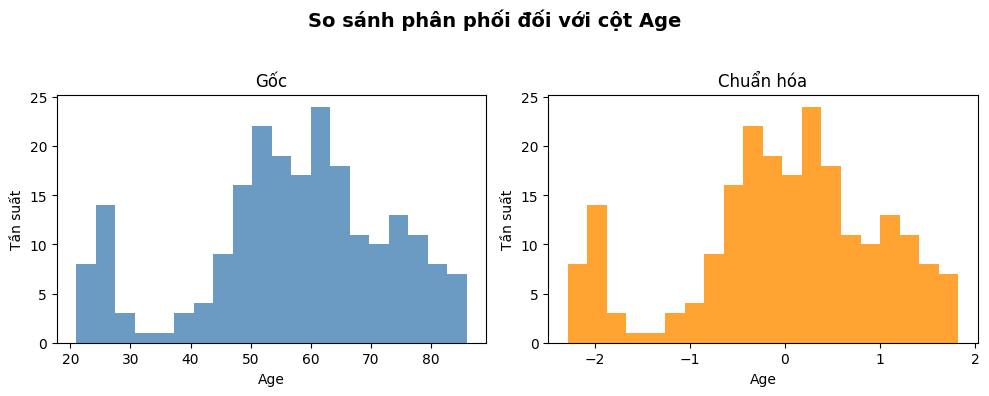

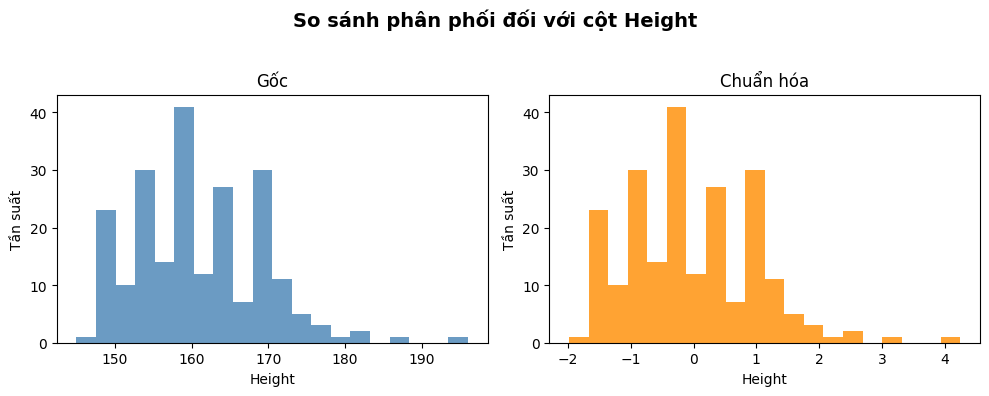

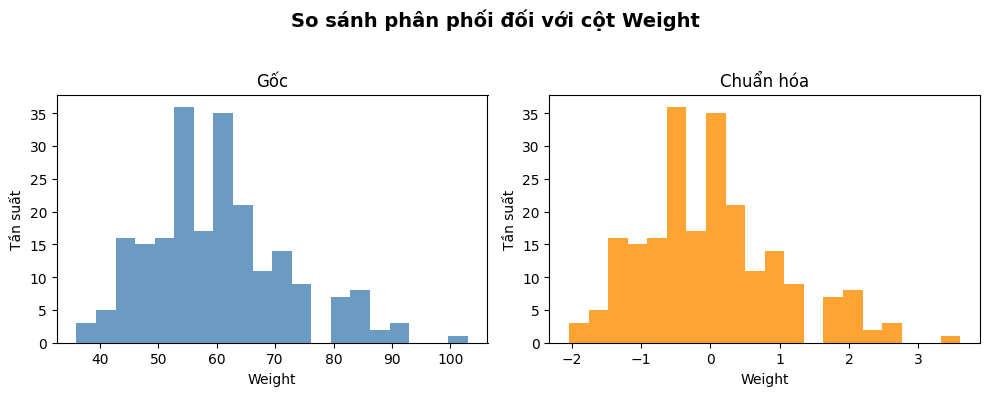

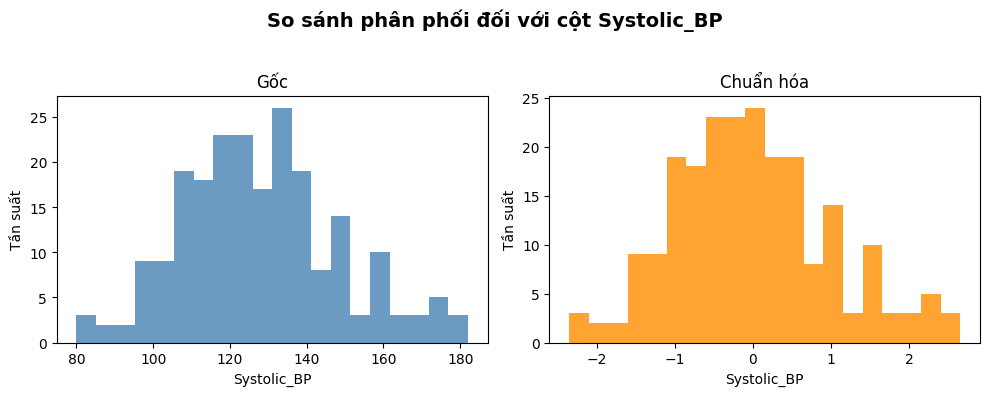

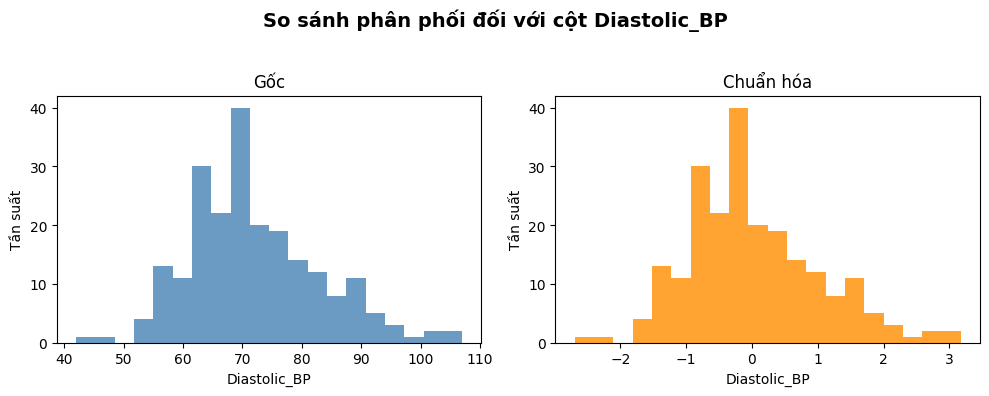

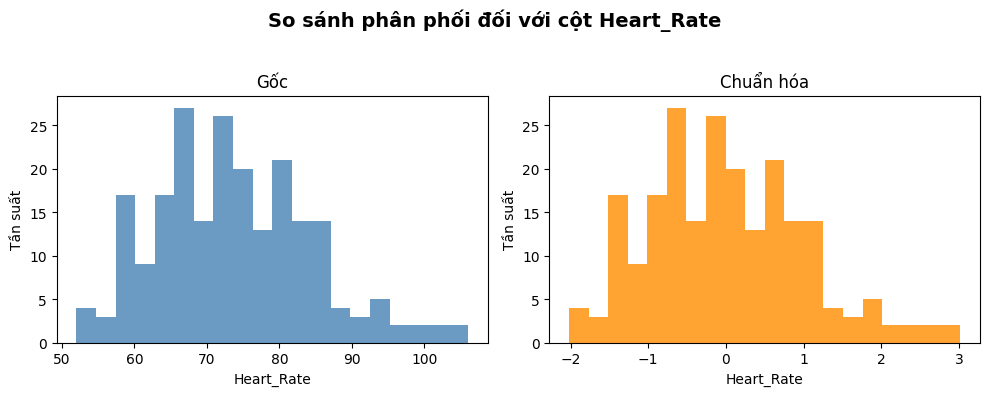

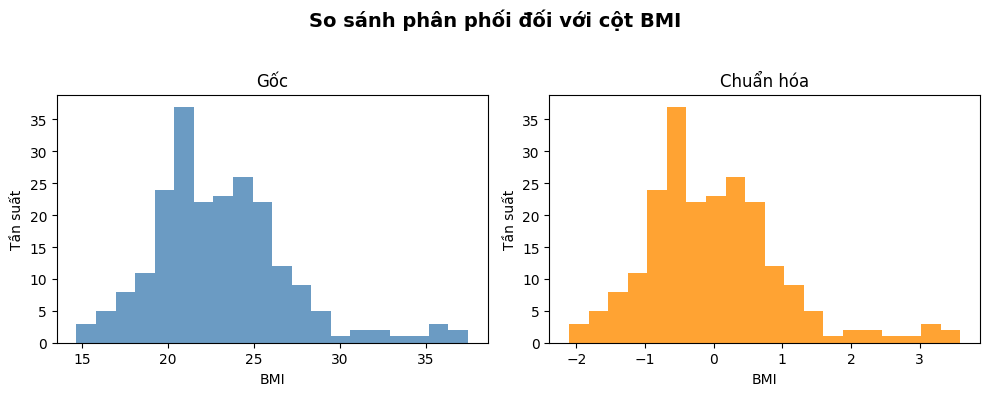

In [175]:
# Bước 11: Đồ thị phân phối trước và sau khi chuẩn hóa
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f"So sánh phân phối đối với cột {col}", fontsize=14, fontweight='bold')

    # Đồ thị phân phối dữ liệu gốc
    axes[0].hist(df[col], bins=20, color='steelblue', alpha=0.8)
    axes[0].set_title("Gốc")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Tần suất")

    # Đồ thị phân phối dữ liệu sau chuẩn hóa
    axes[1].hist(df_scaled[col], bins=20, color='darkorange', alpha=0.8)
    axes[1].set_title("Chuẩn hóa")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Tần suất")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()